<a href="https://colab.research.google.com/github/charu6969/IRIS-Classification/blob/main/Copy_of_Glass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/glass.csv")
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [ ]:
print(data.shape)
data.info()

(214, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [ ]:
data.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


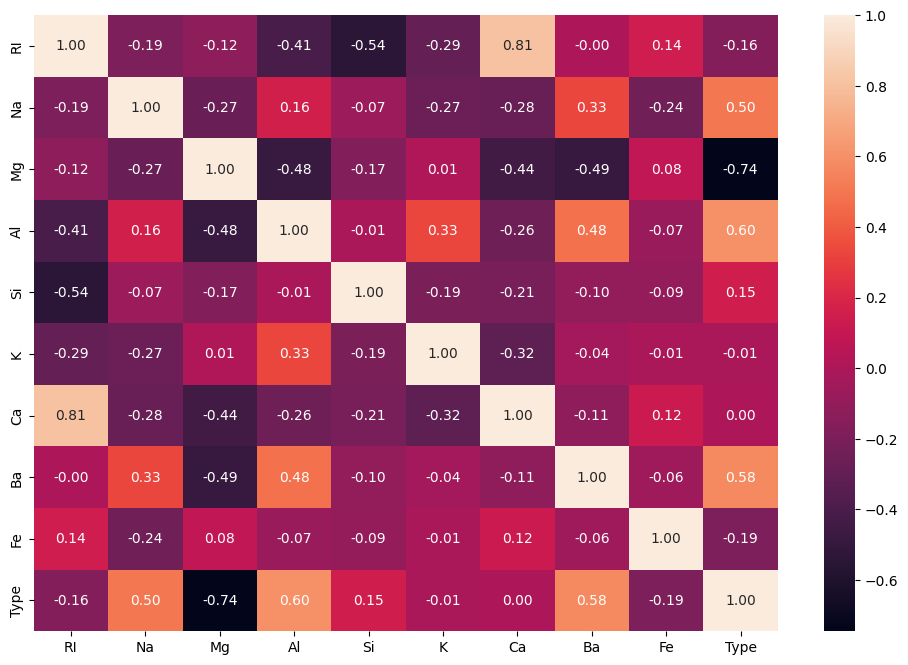

In [ ]:
plt.figure(figsize=(12, 8))
sb.heatmap(data.corr() , annot=True ,fmt='0.2f');
plt.show()

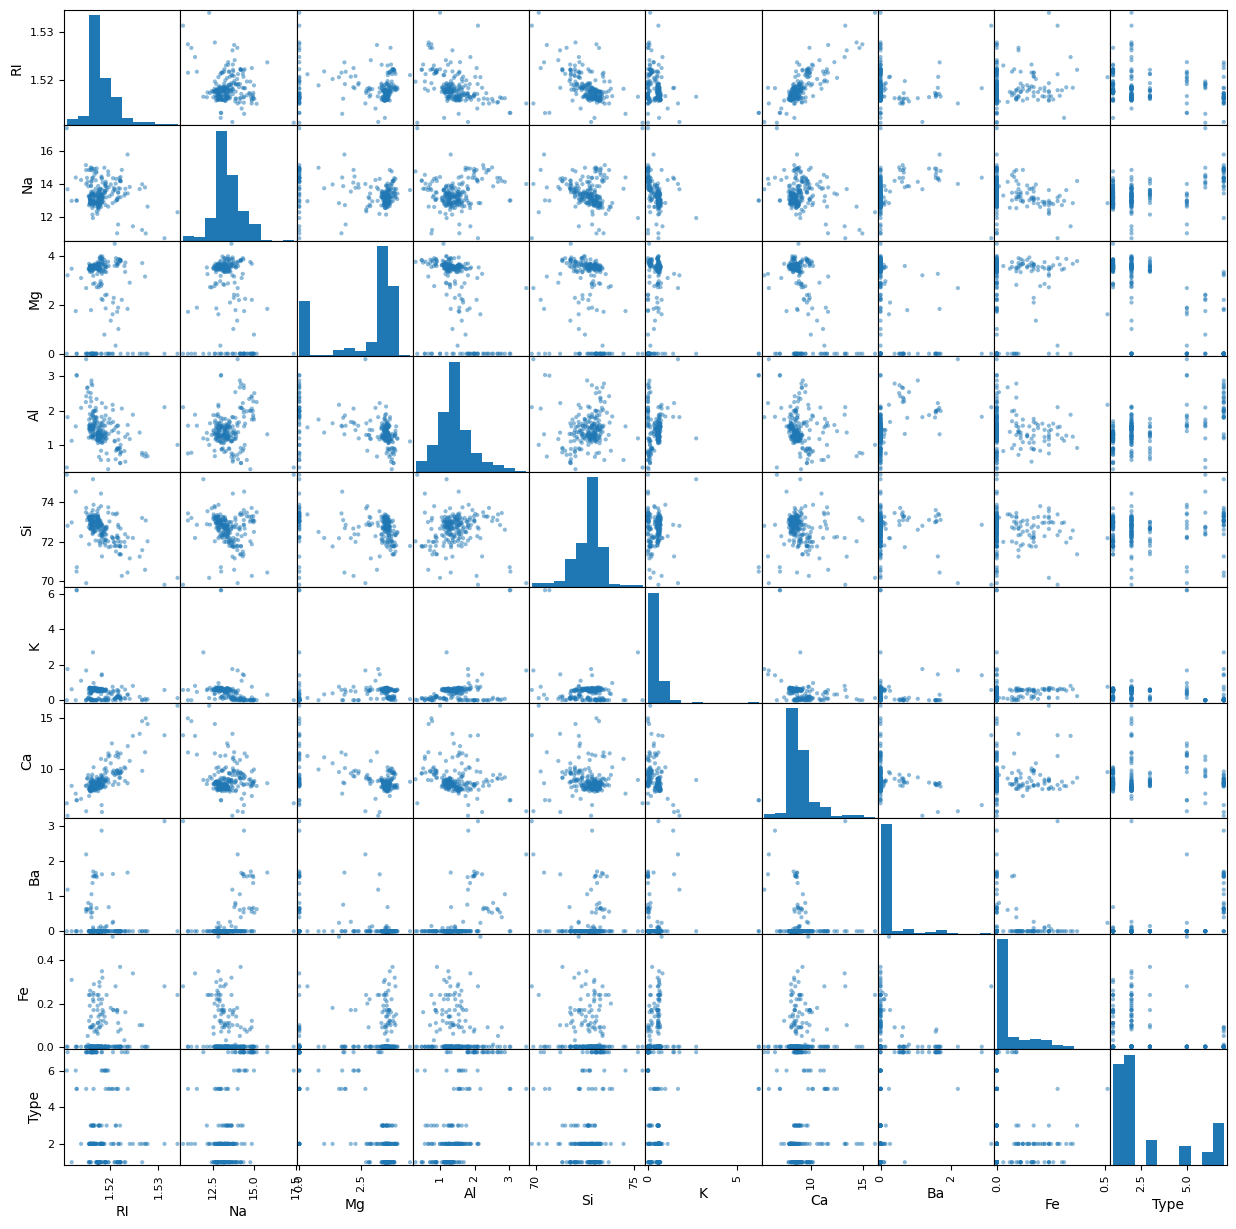

In [ ]:
pd.plotting.scatter_matrix(data, figsize=(15,15));

In [ ]:
y =data.iloc[:,9]
x=data.iloc[:,:-1]
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x))

In [ ]:
trainsize = int(y.shape[0] * 0.8)
testsize = int(y.shape[0] * 0.2)
x_train = x.iloc[:trainsize, :]
y_train = y.iloc[:trainsize]

x_test = x.iloc[trainsize:trainsize + testsize, :]
y_test = y.iloc[trainsize:trainsize + testsize]


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(9, kernel_initializer="he_normal",activation=tf.nn.relu),

    tf.keras.layers.Dense(64,kernel_initializer="he_normal",activation=tf.nn.relu),

    tf.keras.layers.Dense(128,kernel_initializer="he_normal",activation=tf.nn.relu),

    tf.keras.layers.Dense(32,kernel_initializer="he_normal",activation=tf.nn.relu),

    tf.keras.layers.Dense(7,activation="softmax")
])

In [ ]:
loss=tf.keras.losses.SparseCategoricalCrossentropy()
optim = tf.keras.optimizers.Adam(learning_rate=0.006,decay=0.0001)

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [ ]:
model.compile(loss=loss,optimizer=optim,metrics=["accuracy"])

In [ ]:
hist= model.fit(x_train,y_train,epochs=50,batch_size=32)

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 554ms/step - accuracy: 0.4368 - loss: 1.6486
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5772 - loss: 1.1073 
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6684 - loss: 0.8529 
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6704 - loss: 0.7685  
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7080 - loss: 0.6527 
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7272 - loss: 0.6391 
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7463 - loss: 0.5850  
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6927 - loss: 0.5986  
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7778 - loss: 0.5185 
Epoch 10/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7051 - loss: 0.6358  
Epoch 11/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7458 - loss: 0.6016  
Epoch 12/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7670 - loss: 0.5

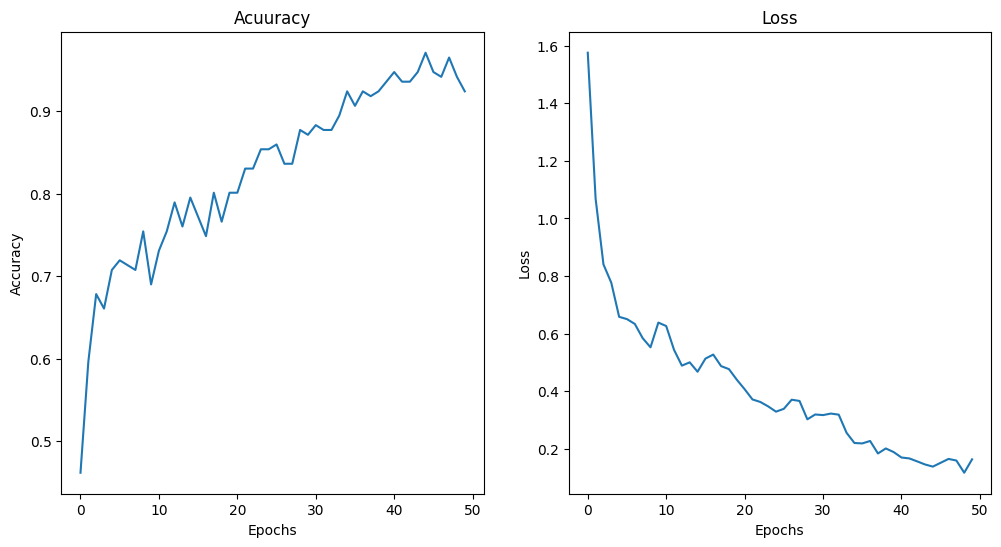

In [ ]:
fig , ax = plt.subplots(1,2,figsize=(12,6))

ax[0].plot(hist.history['accuracy'])
ax[0].set_title("Acuuracy")
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")
ax[1].plot(hist.history['loss'])
ax[1].set_title("Loss")
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss");
